# Demonstration of the YODA 2D plotting API

In [1]:
# Temporary imports to access the yoda_plot2d file
import sys
sys.path.append('..')

In [2]:
# Actual imports that will be used
import yoda_plot2d as yp
import yoda
import matplotlib.pyplot as plt
import numpy as np

## Create example data
This is just setup code for the demo

In [3]:
rng = np.random.default_rng(seed=1)
nevents = 10_000
h1, h2 = yoda.Histo2D(10, -1, 5, 20, -2, 3), yoda.Histo2D(10, -1, 5, 20, -2, 3)

for h in (h1, h2):
    for event in rng.normal(1.5, 1, size=(nevents, 2)):
        h.fill(event[0], event[1])

print(f'{h1 = }, {h2 = }')

h1 = <Histo2D '/' 200 bins, sumw=1e+04>, h2 = <Histo2D '/' 200 bins, sumw=1e+04>


The yoda plotting API accepts any 2D histogram that can be converted to a Scatter object, such as `yoda.Scatter3D`, `yoda.Histo2D`, `yoda.Profile2D`.

## Basic plot
The most simple plot can be created by just passing in the histogram into a plotting function.
The plotting functions intentionally have short names to make it easy to use them to analyze histograms.

### heatmap plot
`heatmap` creates a heatmap of a 2D histogram, with color acting as the 3rd dimension.
By default, a colorbar is added.

(<matplotlib.collections.QuadMesh at 0x7effeb30bd90>,
 <matplotlib.colorbar.Colorbar at 0x7effeb2a1460>)

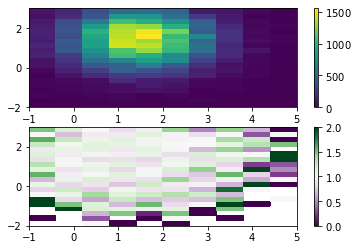

In [5]:
fig, ax = plt.subplots(nrows=2)
yp.heatmap(h1, ax=ax[0], cmap='viridis')
yp.ratio_heatmap(h1, h2, ax=ax[1], cmap='PRGn', zlim=(0, 2))

(<matplotlib.collections.QuadMesh at 0x7effeb2a9970>,
 <matplotlib.colorbar.Colorbar at 0x7effeb2a9fd0>)

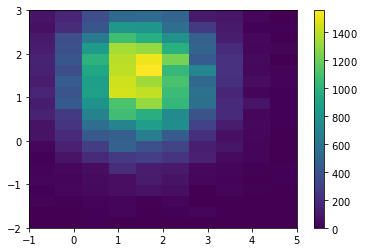

In [6]:
yp.heatmap(h1)

### Surface plot
Another way to visualize a histogram is by using `surface`, which create a surface plot.

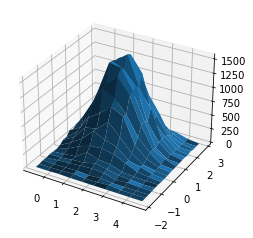

In [7]:
yp.surface(h1)

### Ratio plots
One can also plot ratios between 2 histograms using `ratio_heatmap` and `ratio_surface`

(<matplotlib.collections.QuadMesh at 0x7effe938d3d0>,
 <matplotlib.colorbar.Colorbar at 0x7effe938da60>)

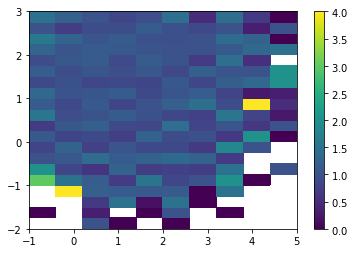

In [8]:
yp.ratio_heatmap(h1, h2)

../yoda_plot2d.py:446: UserWarning: Plotting ratios of histograms with 0-count bins as surface plots can result in unexpected rendering results or even errors.It is recommended to use it carefully or to plot a heatmap instead.
  warnings.warn('Plotting ratios of histograms with 0-count bins as surface plots can result in unexpected rendering results or even errors.'


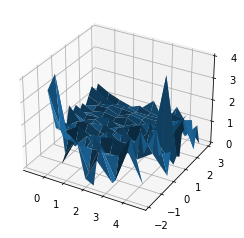

In [9]:
yp.ratio_surface(h1, h2)

The warning raised when running `ratio_surface` is due to the fact that some bins have 0 counts, which results in division by zero. 
These bins will be masked but plotting of masked surfaces are not officially supported in matplotlib, which might result in a strange plot, i.e., rendering artifacts. If fully consistent behavior for masked values is desired, it is recommended to use `heatmap` instead.

## Plotting options
One can also customize the look of the plots by passing additional arguments to the plotting functions.
This is what Rivet uses for many of its customizations to the look of the plots. 

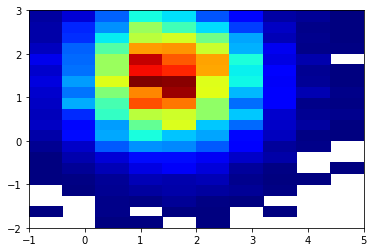

In [10]:
fig, ax = plt.subplots()
yp.heatmap(
    h2, 
    ax=ax,              # Specify custom Axes object in which the plot will be drawn
    showzero=False,     # Do not color the 0-count bins
    colorbar=False,     # Do not plot the colorbar
    cmap='jet'          # Change colormap
)

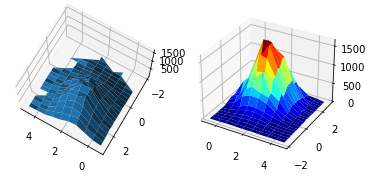

In [11]:
fig, axes = plt.subplots(ncols=2, subplot_kw=dict(projection='3d')) # heatmap='3d' must be used here!
yp.surface(
    h2, 
    ax=axes[0],
    elev=70,        # Elevation rotation of the "camera"
    azim=120,       # Azimuthal rotation of the "camera"
    showzero=False  # Not recommended for plot_surface
)

yp.surface(
    h2, 
    ax=axes[1],
    cmap='jet'      # Color matches the z values
)

Note
----
`plot_surface` does not officially support NaN values, and can therefore cause unexpected results. This might however be solved soon, thanks to [this pull request](https://github.com/matplotlib/matplotlib/pull/20725/).

## Axis customization
One can also customize the look of the x, y, and z axis with a unified API for both heatmap plots and surface plots.
Axis formatting can be passed to the plotting functions via a number of keyword arguments, such as `xlabel`, `ylabel`, `zlabel`. These are in turn passed to values are in turn passed to `format_axis`, which can also be used on its own (although using it via the plotting functions is typically more convenient). 

The code below shows an example use case of axis formatting and its corresponding `format_axis`.

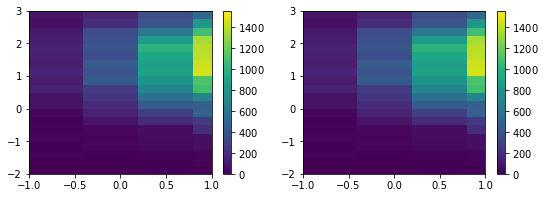

In [12]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 3))

yp.heatmap(h1, ax=axes[0], xlim=(-1, 1))

yp.heatmap(h1, ax=axes[1])
yp.format_axis(axis_name='x', ax=axes[1], lim=(-1, 1))

Note how the x axis is formatted in the same way for both plots. These functions are roughly equivalent. Note however that the call to `format_axis` needed to be more verbose, by specifying the axis name and the matplotlib Axes object. 

Here are additional axis settings that can be changed. 

(<matplotlib.collections.QuadMesh at 0x7effe939b1c0>,
 <matplotlib.colorbar.Colorbar at 0x7effe9371ee0>)

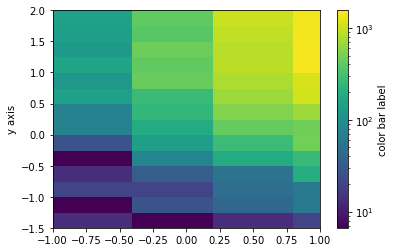

In [13]:
yp.heatmap(h1, 
    xlim=(-1, 1), 
    ylim=(-1.5, 2), ylabel='y axis',
    zlabel='color bar label', logz=True
)

The `surface` function also accepts the same axis formatting arguments but can lead to strange behavior, especially `lim` and `log`, due to the limited support for 3D plotting in matplotlib.

## Further customization using matplotlib
The return values from the yoda plotting functions are the artist objects created by matplotlib. If desired, one can therefore fully customize the plot using matplotlib, while also using the yoda plotting API. 

However, this is in many cases not necessary. 
One can pass additional parameters via e.g. `psurf_kw`, which is a dict of keyword arguments that will be passed to the underlying matplotlib plotting function. Additionally, all extra parameters passed to the yoda plotting functions are passed to `ax.set`, which allows further customization of the plot.

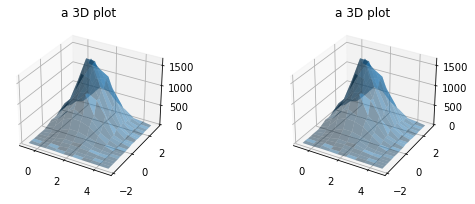

In [14]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 3), subplot_kw=dict(projection='3d'))

mpl_artist = yp.surface(h2, axes[0])
axes[0].set_title('a 3D plot')
mpl_artist.set_alpha(0.5)
# The above 3 lines are equivalent to the "oneliner" below.
yp.surface(
    h2, axes[1], 
    psurf_kw=dict(alpha=0.5),   # Additional arguments passed to plot_surface in matplotlib 
    title='a 3D plot'           # Passed to ax.set
)

## Additional Resources
A full list of all parameters that the yoda plotting functions accept can be found in the docstring, which can e.g. be shown with
```python
yp.heatmap?
# or for surface plots:
yp.surface?
```
in IPython and jupyter notebooks, or 
```python
help(yp.heatmap)
# or for surface plots:
help(yp.surface)
```
when using Python anywhere.